In [2]:
# ライブラリの読み込み
import os
import scipy as sp
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# グラフをインラインで表示させる
%matplotlib inline

In [3]:
df_train = pd.read_csv('./train_set.csv',delimiter=",")
df_train.columns

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,19,20,21,22,23,32,33,34,36,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Id', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT', 'PRICE'],
      dtype='object')

In [4]:
df_train.AYB.describe()

count    49052.000000
mean      1945.066929
std         36.236955
min       1754.000000
25%       1918.000000
50%       1939.000000
75%       1966.000000
max       2018.000000
Name: AYB, dtype: float64

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.700e+01, 3.000e+00, 0.000e+00, 9.000e+00,
        6.000e+00, 1.000e+00, 7.000e+00, 2.000e+00, 0.000e+00, 9.000e+00,
        0.000e+00, 0.000e+00, 8.000e+00, 1.000e+00, 2.000e+00, 2.900e+01,
        8.000e+00, 1.000e+00, 1.600e+01, 2.100e+01, 2.000e+00, 6.300e+01,
        1.040e+02, 2.100e+01, 1.790e+02, 1.790e+02, 3.900e+01, 6.910e+02,
        3.360e+02, 4.700e+01, 2.933e+03, 1.290e+02, 1.867e+03, 2.657e+03,
        1.616e+03, 1.506e+03]),
 array([1754.  , 1757.28, 1760.56, 1763.84, 1767.12, 1770.4 , 1773.68,
        1776.96, 1780.24, 1783.52, 1786.8 , 1790.08, 1793.36, 1796.64,
        1799.92, 1803.2 , 1806.48, 1809.76, 1813.04, 1816.32, 1819.6 ,
        1822.88, 1826.16, 1829.44, 1832.72, 1836.  , 1839.28, 1842.56,
        1845.84, 1849.12, 1852.4 , 1855.68, 1858.96, 1862.24, 1865.52,
        1868.8 , 1872

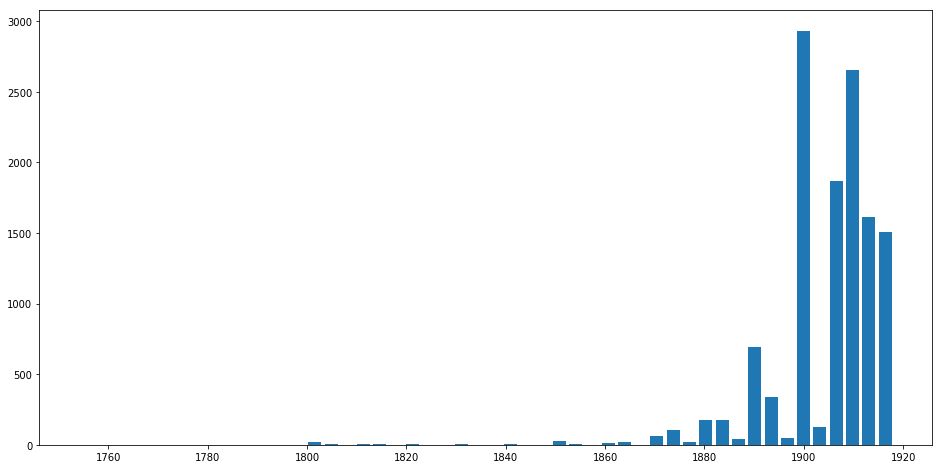

In [13]:
# min -> 1/4
plt.figure(figsize=(16,8)) #figsize調整
plt.hist( df_train["AYB"],bins=50,rwidth=0.8,range=[1754,1918])

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 756., 1151.,    0.,  927.,    0.,  884.,    0.,  199.,    0.,
         253.,    0.,  273.,  244.,    0.,  565.,    0.,  438.,    0.,
         378.,    0.,  706.,    0.,  547.,    0.,  421.,  456.,    0.,
         299.,    0.,  346.,    0.,  301.,    0.,  264.,    0.,  125.,
           0.,  366.,  593.,    0.,  169.,    0.,  192.,    0.,  307.,
           0.,  554.,    0.,  461.,  273.]),
 array([1939.  , 1939.54, 1940.08, 1940.62, 1941.16, 1941.7 , 1942.24,
        1942.78, 1943.32, 1943.86, 1944.4 , 1944.94, 1945.48, 1946.02,
        1946.56, 1947.1 , 1947.64, 1948.18, 1948.72, 1949.26, 1949.8 ,
        1950.34, 1950.88, 1951.42, 1951.96, 1952.5 , 1953.04, 1953.58,
        1954.12, 1954.66, 1955.2 , 1955.74, 1956.28, 1956.82, 1957.36,
        1957.9 , 1958.44, 1958.98, 1959.52, 1960.06, 1960.6 , 1961.14,
        1961.68, 1962.22, 1962.76, 1963.3 , 1963.84, 1964.38, 1964.92,
        1965.46, 1966.  ]),
 <a list of 50 Patch objects>)

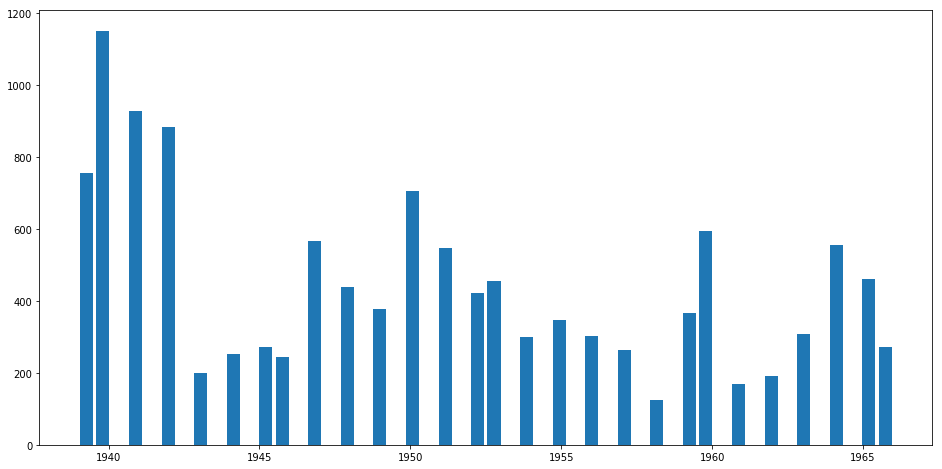

In [14]:
# 1/4 -> 1/2
plt.figure(figsize=(16,8)) #figsize調整
plt.hist( df_train["AYB"],bins=50,rwidth=0.8,range=[1939,1966])

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([750., 189.,  39.,  42.,  86.,  35.,  73., 113.,  71.,  63., 205.,
        305., 228., 360., 319.,  63.,  47.,  81., 261.,  64., 135., 131.,
        290.,  84., 178.,  42.,  44.,  37.,  45.,  52., 104.,  95., 254.,
        191., 429., 301., 688., 881., 869., 974., 618., 282., 157., 185.,
        186., 357., 315., 405., 462., 263.]),
 array([1966.  , 1967.04, 1968.08, 1969.12, 1970.16, 1971.2 , 1972.24,
        1973.28, 1974.32, 1975.36, 1976.4 , 1977.44, 1978.48, 1979.52,
        1980.56, 1981.6 , 1982.64, 1983.68, 1984.72, 1985.76, 1986.8 ,
        1987.84, 1988.88, 1989.92, 1990.96, 1992.  , 1993.04, 1994.08,
        1995.12, 1996.16, 1997.2 , 1998.24, 1999.28, 2000.32, 2001.36,
        2002.4 , 2003.44, 2004.48, 2005.52, 2006.56, 2007.6 , 2008.64,
        2009.68, 2010.72, 2011.76, 2012.8 , 2013.84, 2014.88, 2015.92,
        2016.96, 2018.  ]),
 <a list of 50 Patch objects>)

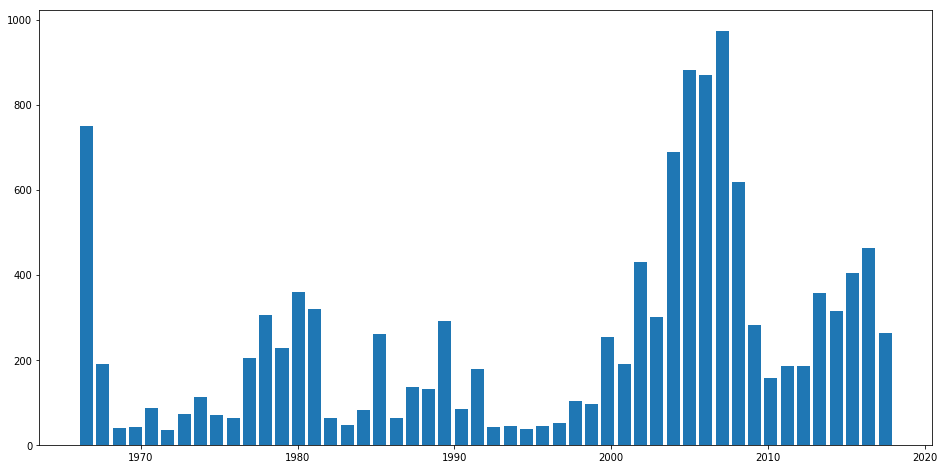

In [15]:
# 1/2 ->3/4
plt.figure(figsize=(16,8)) #figsize調整
plt.hist( df_train["AYB"],bins=50,rwidth=0.8,range=[1966,2018])

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([750., 189.,  39.,  42.,  86.,  35.,  73., 113.,  71.,  63., 205.,
        305., 228., 360., 319.,  63.,  47.,  81., 261.,  64., 135., 131.,
        290.,  84., 178.,  42.,  44.,  37.,  45.,  52., 104.,  95., 254.,
        191., 429., 301., 688., 881., 869., 974., 618., 282., 157., 185.,
        186., 357., 315., 405., 462., 263.]),
 array([1966.  , 1967.04, 1968.08, 1969.12, 1970.16, 1971.2 , 1972.24,
        1973.28, 1974.32, 1975.36, 1976.4 , 1977.44, 1978.48, 1979.52,
        1980.56, 1981.6 , 1982.64, 1983.68, 1984.72, 1985.76, 1986.8 ,
        1987.84, 1988.88, 1989.92, 1990.96, 1992.  , 1993.04, 1994.08,
        1995.12, 1996.16, 1997.2 , 1998.24, 1999.28, 2000.32, 2001.36,
        2002.4 , 2003.44, 2004.48, 2005.52, 2006.56, 2007.6 , 2008.64,
        2009.68, 2010.72, 2011.76, 2012.8 , 2013.84, 2014.88, 2015.92,
        2016.96, 2018.  ]),
 <a list of 50 Patch objects>)

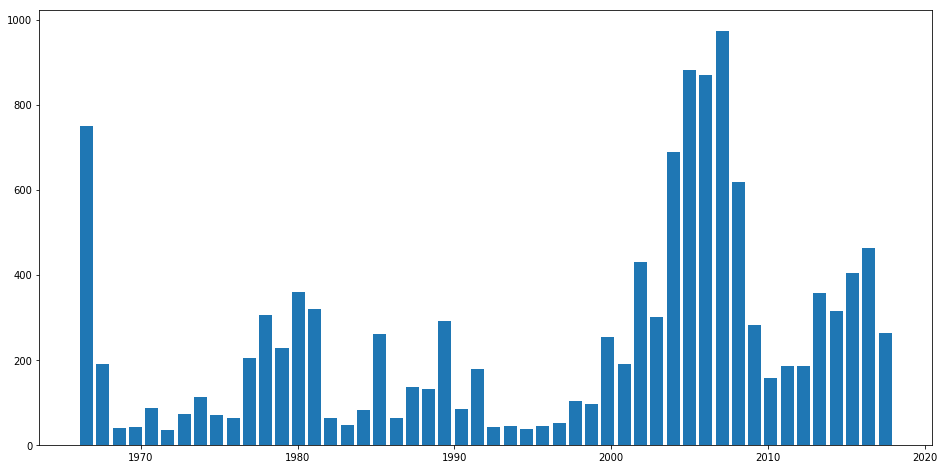

In [16]:
# 3/4 -> max
plt.figure(figsize=(16,8)) #figsize調整
plt.hist( df_train["AYB"],bins=50,rwidth=0.8,range=[1966,2018])

In [ ]:
pd.crosstab(df_train.AYB, df_train.GRADE)

var = "PRICE"
data = pd.concat([df_train['CNDTN'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="CNDTN", data=data)